# Introduccion al manejo de bases de datos

## No siempre fueron tablas ...

Existe cierta tendencia a considerar el ordenamiento en filas y columnas como único posible. Una especie de "hegemonía del excel".

Pensar en tablas (o, "¿cuáles serían las filas y cuáles las columnas?") nos brinda un marco de interpretación rápida. Que la información tenga una estructura, nos permite entender o decodificar simplificadamente lo que representa esa forma de disponerla.

Ahora bien, también es cierto que esta no es la única estructura posible. Como vimos en la clase anterior, python cuenta con más de una.  

Y con esto, vamos a dar el primer paso para empezar a deconstruir ese "pensar en tablas": entender cómo funcionan en python (qué tipo de objeto son, cuáles son sus atributos y los métodos que soportan).

Para eso, debemos empezar por conocer con qué recursos contamos para, lo que comunmente se conoce como "levantar un dataset, leer una tabla" o sencillamente, "cargar un archivo".

## `Pandas` y sus formas ... de leer archivos!

Como vimos en la clase anterior, python no trabaja nativamente con tablas. Una de las librerías más populares o utilizadas para poder cargar marcos tabulares es [pandas](https://github.com/pandas-dev/pandas).

Esta cuenta con distintos métodos de tipo `read` para leer diferentes archivos. 

Para ver como cargar archivos, una de las primeras cosas que debemos tener en cuenta es que, por el entorno en el que estamos trabajando - [Google Colaboraroty](https://colab.research.google.com/notebooks/basic_features_overview.ipynb) existen algunos pasos previos. 


### 1. Montado del `Drive`

Lo primero que tenemos que tener en cuenta para abrir un archivo, ya sea estemos trabajando en Colab, Jupyter o cualquier otro entorno de trabajo, es la nocion de directorio. Si queremos, por ejemplo, leer un archivo csv tenemos que saber donde estamos y donde es necesario pararnos para levantarlo. 

`ls` (o list, un comando propio del sistema operativo Unix y sus derivados) es una instruccion que puede ayudarnos para esto. Comencemos por listar lo que tenemos en nuestro directorio.

In [ ]:
!ls 

sample_data


El directorio donde estamos parados solo nos muestra la carpeta sample_data, movamonos hacia atras con `..` y fijemonos de nuevo

In [ ]:
!ls ..

bin	 dev   lib32  NGC-DL-CONTAINER-LICENSE	root  sys    var
boot	 etc   lib64  opt			run   tmp
content  home  media  proc			sbin  tools
datalab  lib   mnt    python-apt		srv   usr


Por lo que se ve, tenemos varios directorios. El que nos importa se llama `drive`. Ahi es donde cargaremos la data de nuestro curso. Ahí también pueden guardar copias de los notebooks si lo desean. Pero este directorio se vuelve visible solamente cuando lo montamos. De esta forma...

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/drive/')

Mounted at /drive/


Como pudieron ver, luego de ingresar el codigo de seguridad, el drive esta montado. Listemos de nuevo a ver lo que tenemos...

In [ ]:
!ls ../drive/'My Drive'

 alquileres-IVC   documentacion_catalano	        PERSONAL
 BORRADOR	 'Gestion de ciudades'		       'Sistema SYT'
 CAF-MOVILIDAD	 'Meet Recordings'		        TDSU
 CursoOBRAS	 'Metodos cuantitativos (R y Python)'


Ahora, nos vamos a tener que organizar un poco. Para eso, les vamos a pedir que dentro de `My Drive` creen una carpeta con el nombre del curso y allí dentro creen `data`.

Descarguen allí el archivo `csv` de `Radios censales` en el [link de descargas del precenso de vivienda](https://precensodeviviendas.indec.gob.ar/descargas#) 

(para saber un poco más del precenso pueden acceder a este [link](https://precensodeviviendas.indec.gob.ar/))


Pero último, importemos la libreria con la que lo vamos a abrir: `pandas`.

In [1]:
# importamos pandas con un alias
import pandas as pd

In [ ]:
print(pd.__version__)

1.3.5


In [ ]:
df = pd.read_csv('/drive/MyDrive/Gestion de ciudades/data/precenso viviendas/precenso_radios.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

Para poder interpretarlas, es importante acceder al [diccionario de la base](https://precensodeviviendas.indec.gob.ar/docs/diccionario_base_precenso_viviendas.pdf)

### 2. Clonando un repositorio desde `Git`

Otra alternativa alternativa para llamar a nuestros datos tambien podria haber sido importarlos directamente desde algún repositorio en [GitHub](https://github.com/), una herramienta bastante practica para trabajar con codigo. 

Si hubiésemos estado trabajando en el marco de algún proyecto, podriamos haber clonado su repositorio para consultar el directorio que contiene la data. Por ejemplo...

In [ ]:
!git clone https://github.com/PyMap/datahouse.git

Cloning into 'datahouse'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 102 (delta 1), reused 0 (delta 0), pack-reused 93
Receiving objects: 100% (102/102), 50.42 MiB | 13.75 MiB/s, done.
Resolving deltas: 100% (30/30), done.


Veran que el repositorio se descargo en el directorio `content`.

In [ ]:
!ls 

datahouse  sample_data


In [ ]:
!ls datahouse/caba

barrios_wkt.csv  precenso_vivienda_radios.zip


... lo descomprimimos

In [ ]:
!unzip 'datahouse/caba/precenso_vivienda_radios.zip'

Archive:  datahouse/caba/precenso_vivienda_radios.zip
  inflating: precenso_vivienda_radios.csv  


In [ ]:
# abrimos de nuevo nuestro dataframe
df = pd.read_csv('/content/precenso_vivienda_radios.csv')


### 3. Servicios como `Google Cloud Storage`.

Otra alternativa para cargar datasets son los buckets de almacenamiento. `Google` tiene su opción (así como Amazon u otros proveedores). A continuación vemos cómo se puede usar uno con acceso es público. 

In [2]:
url = 'https://storage.googleapis.com/python_mdg/carto_cursos/precenso_vivienda_radios.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.columns

Index(['FID', 'id', 'nomloc', 'geom', 'area', 'perimeter', 'prov', 'depto',
       'codloc', 'frac', 'radio', 'link', 'ind01', 'ind05', 'ind06', 'ind07',
       'nomprov', 'nomdepto'],
      dtype='object')

##  Pandas, usos y costumbres

<figure>
<center>
<img src='https://drive.google.com/uc?id=1ZFhdfMzeIpgqDlF_SfB1CJTVv5NxJ-86' />
<figcaption></figcaption></center>
</figure>



Dijimos que pandas era una de las librerías más populares y flexibles para el manejo de datos almacenados en estructuras tabulares.

Veamos ahora que tenemos un dataset para explorar, cómo valernos de algunos de sus recursos.

In [5]:
# tenemos un objecto de tipo pandas.DataFrame
type(df)

pandas.core.frame.DataFrame

In [6]:
# veamos sus primeras tres filas
df.head(3)

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,ind01,ind05,ind06,ind07,nomprov,nomdepto
0,radios.fid--bb562cf_1793415e9df_626,1,Ushuaia,MULTIPOLYGON (((-68.33620817638486 -54.8128028...,115823.151,1970.060,94,15,20,8,5,940150200805,432,31.5,65.3,18.1,"Tierra del Fuego, Antártida e Islas del Atlánt...",Ushuaia
1,radios.fid--bb562cf_1793415e9df_627,3,Río Grande,MULTIPOLYGON (((-67.70492137906528 -53.7844312...,161845.907,1860.913,94,8,10,12,1,940080101201,336,34.1,65.6,17.8,"Tierra del Fuego, Antártida e Islas del Atlánt...",Río Grande
2,radios.fid--bb562cf_1793415e9df_628,4,Puerto Santa Cruz,MULTIPOLYGON (((-68.51789943559842 -50.0160281...,575906.848,3271.483,78,7,20,6,3,780070200603,479,65.9,29.1,0.0,Santa Cruz,Corpen Aike


In [7]:
# o sus tres ultimas
df.tail(3)

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,ind01,ind05,ind06,ind07,nomprov,nomdepto
37814,radios.fid--bb562cf_179345dc61d_-6623,384,La Rancherita,MULTIPOLYGON (((-64.46343721145448 -31.7425920...,2154123.628,10771.074,14,147,170,6,1,141471700601,149,83.7,14.2,0.0,Córdoba,Santa María
37815,radios.fid--bb562cf_179345dc61d_-6622,365,Finca del Sol - San Francisco - Catalina Norte,MULTIPOLYGON (((-64.22838939915832 -31.2665505...,1298687.286,11826.381,14,21,105,5,5,140211050505,0,0.0,0.0,0.0,Córdoba,Colón
37816,radios.fid--bb562cf_179345dc61d_-6621,1390,Las Chacras,MULTIPOLYGON (((-64.13516147900155 -31.3053933...,72384.686,1139.745,14,21,175,7,1,140211750701,0,0.0,0.0,0.0,Córdoba,Colón


In [8]:
# Y por que no algunas al azar?
df.sample(3)

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,ind01,ind05,ind06,ind07,nomprov,nomdepto
6115,radios.fid--bb562cf_1793415e9df_1e09,6083,Tafí Viejo,MULTIPOLYGON (((-65.2577059549173 -26.73069155...,110817.670,1440.292,90,105,80,9,10,901050800910,193,69.5,23.2,40.9,Tucumán,Tafí Viejo
36909,radios.fid--bb562cf_179345dc61d_-69ac,27107,Ciudad Autónoma de Buenos Aires,MULTIPOLYGON (((-58.47490164290697 -34.5456869...,57147.659,972.620,2,84,10,4,8,20840100408,430,33.0,67.0,61.5,Ciudad Autónoma de Buenos Aires,Comuna 12
19630,radios.fid--bb562cf_1793415e9df_52d4,20764,Rosario,MULTIPOLYGON (((-60.68803063540642 -32.9141660...,77621.433,1291.772,82,84,270,7,19,820842700719,365,72.9,25.5,12.9,Santa Fe,Rosario


Una forma menos programatica de hacerlo involucraría al modulo `data_table`. Así,

In [9]:
from google.colab import data_table

In [10]:
muestra = df.iloc[:,4:].sample(1000)

In [11]:
# cargamos el dataframe
data_table.DataTable(muestra, 
                     include_index=False, # podemos decidir si mostrar el índice o no
                     num_rows_per_page=15) # y también cuantas filas por pagina mostrar

,area,perimeter,prov,depto,codloc,frac,radio,link,ind01,ind05,ind06,ind07,nomprov,nomdepto
37629,24849.856,636.347,2,98,10,29,7,20980102907,603,0.2,99.8,100.0,Ciudad Autónoma de Buenos Aires,Comuna 14
11411,118440.679,1444.601,50,105,210,4,15,501052100415,243,39.3,56.6,38.7,Mendoza,San Rafael
22746,89198.953,1254.426,6,840,10,28,9,68400102809,403,55.6,41.7,61.3,Buenos Aires,Tres de Febrero
30887,102507.346,1281.433,90,84,10,9,14,900840100914,362,46.4,53.3,92.7,Tucumán,Capital
6231,776392.082,4147.670,18,70,20,22,16,180700202216,552,81.2,16.5,0.0,Corrientes,Goya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21068,1621764.256,8481.140,6,413,50,14,9,64130501409,176,95.5,0.0,0.0,Buenos Aires,Junín
3722,17778.149,1064.803,6,665,40,13,2,66650401302,0,0.0,0.0,0.0,Buenos Aires,Ramallo
22831,302512.331,2738.768,82,84,270,11,7,820842701107,537,87.0,12.5,0.0,Santa Fe,Rosario
20150,41019.651,848.007,6,420,20,15,4,64200201504,501,2.2,97.4,97.5,Buenos Aires,La Costa


In [12]:
# hagamos una copia del mismo, solo para asignarle un nombre un poco mas informativo 
precenso_viviendas = df.copy()

### Estructuras nativas, loops y otras yerbas

Algo fundamental a la hora de empezar a trabajar con cualquier base de datos, es familiarizarnos con ella. Saber qué columnas tiene, cuáles son sus dtypes, qué cantidad de registros tiene cada una, si existen o no valores nulos, etc. 

Esto es importante, no sólo para tener una idea de cual es la calidad de los datos, sino tambien para planificar transformaciones que nos allanen un poco el camino: castear columnas con otros dtypes, acortar nombres, rellenar casos perdidos, etc.

In [13]:
# el metodo info, nos puede brindar un primer pantallazo
precenso_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37817 entries, 0 to 37816
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FID        37817 non-null  object 
 1   id         37817 non-null  int64  
 2   nomloc     37817 non-null  object 
 3   geom       37817 non-null  object 
 4   area       37817 non-null  float64
 5   perimeter  37817 non-null  float64
 6   prov       37817 non-null  int64  
 7   depto      37817 non-null  int64  
 8   codloc     37817 non-null  int64  
 9   frac       37817 non-null  int64  
 10  radio      37817 non-null  int64  
 11  link       37817 non-null  int64  
 12  ind01      37817 non-null  int64  
 13  ind05      37814 non-null  float64
 14  ind06      37814 non-null  float64
 15  ind07      37814 non-null  float64
 16  nomprov    37817 non-null  object 
 17  nomdepto   37817 non-null  object 
dtypes: float64(5), int64(8), object(5)
memory usage: 5.2+ MB


Se puede apreciar que nuestro dataframe cuenta con 18 columnas, algunas de las cuales presentan valores nulos - como por ejemplo los `ind_0x`. También sabemos que 5 de ellas contienen valores decimales, 8 con enteros y otras 5 con valores object (que serían una especie de string o cadenas de caracteres). 


In [14]:
precenso_viviendas.columns

Index(['FID', 'id', 'nomloc', 'geom', 'area', 'perimeter', 'prov', 'depto',
       'codloc', 'frac', 'radio', 'link', 'ind01', 'ind05', 'ind06', 'ind07',
       'nomprov', 'nomdepto'],
      dtype='object')

In [15]:
# las columnas del dataframe se pueden "iterar" como cualquier otro tipo de coleccion indexada
for i in precenso_viviendas.columns:
  print(i)

FID
id
nomloc
geom
area
perimeter
prov
depto
codloc
frac
radio
link
ind01
ind05
ind06
ind07
nomprov
nomdepto


In [16]:
for i in range(1,10):
  print(i+2)

3
4
5
6
7
8
9
10
11


In [17]:
counter = 0 
for columna in precenso_viviendas.columns:
  print("Posicion:{}".format(counter))
  print(columna)
  counter += 1

Posicion:0
FID
Posicion:1
id
Posicion:2
nomloc
Posicion:3
geom
Posicion:4
area
Posicion:5
perimeter
Posicion:6
prov
Posicion:7
depto
Posicion:8
codloc
Posicion:9
frac
Posicion:10
radio
Posicion:11
link
Posicion:12
ind01
Posicion:13
ind05
Posicion:14
ind06
Posicion:15
ind07
Posicion:16
nomprov
Posicion:17
nomdepto


Si prestan atención, tanto en un caso como en el otro use distintas denominaciones. `i` es algo que en POO se conoce como `place holder`. Esa letra hace referencia a la palabra `item`. Lo que representa que "para cada item" de la colección x - nuestras columnas - se haga algo. Ese algo es lo que está indentado después de los dos puntos.

Algunos nombres de estas columnas no son muy indicativos. Veamos cuál es su significado y adaptemoslos.

In [18]:
columnas = precenso_viviendas.columns

In [19]:
columnas[12]

'ind01'

In [20]:
for idx,item in enumerate(columnas):
  print(idx,item)

0 FID
1 id
2 nomloc
3 geom
4 area
5 perimeter
6 prov
7 depto
8 codloc
9 frac
10 radio
11 link
12 ind01
13 ind05
14 ind06
15 ind07
16 nomprov
17 nomdepto


In [21]:
nuevas_columnas = []
for idx,item in enumerate(columnas):
  if idx == 12:
    nombre = 'total_viviendas'
  else:
    nombre = item
  nuevas_columnas.append(nombre)

In [22]:
# vean que ahora tenemos un nuevo nombre
nuevas_columnas

['FID',
 'id',
 'nomloc',
 'geom',
 'area',
 'perimeter',
 'prov',
 'depto',
 'codloc',
 'frac',
 'radio',
 'link',
 'total_viviendas',
 'ind05',
 'ind06',
 'ind07',
 'nomprov',
 'nomdepto']

In [23]:
# otro recurso para iterar y ejectuar modificaciones es una comprehension list
[i for i in columnas]

['FID',
 'id',
 'nomloc',
 'geom',
 'area',
 'perimeter',
 'prov',
 'depto',
 'codloc',
 'frac',
 'radio',
 'link',
 'ind01',
 'ind05',
 'ind06',
 'ind07',
 'nomprov',
 'nomdepto']

In [24]:
# primero, la transformacion con el condicional y despues el loop
['total_viviendas' if i == 'ind01' else i for i in columnas]

['FID',
 'id',
 'nomloc',
 'geom',
 'area',
 'perimeter',
 'prov',
 'depto',
 'codloc',
 'frac',
 'radio',
 'link',
 'total_viviendas',
 'ind05',
 'ind06',
 'ind07',
 'nomprov',
 'nomdepto']

In [25]:
# ahora podriamos renombrar las columnas de nuestro dataframe
precenso_viviendas.columns = nuevas_columnas

In [26]:
type(nuevas_columnas)

list

In [27]:
precenso_viviendas.columns

Index(['FID', 'id', 'nomloc', 'geom', 'area', 'perimeter', 'prov', 'depto',
       'codloc', 'frac', 'radio', 'link', 'total_viviendas', 'ind05', 'ind06',
       'ind07', 'nomprov', 'nomdepto'],
      dtype='object')

Esa sería una forma. En python, como en POO en general, existen varios caminos para llegar al mismo lugar. Generalmente, algunos son mejores que otros (o de mínima, más adecuados).

Para cambiar nombres de columnas, los diccionarios son un tipo de estructura muy útil para mapear valores. Así:

In [28]:
# creamos un diccionario
reemplazos = {'ind05':'ptipo_casa', 'ind06':'ptipo_depto_mix','ind07':'ptipo_depto_alt'}

In [29]:
# ahora mapeamos los reemplazos en el dataframe
precenso_viviendas.rename(columns=reemplazos, inplace=True)

In [30]:
# ahora si, ajustamos las columnas con los nombres que queriamos
precenso_viviendas.columns

Index(['FID', 'id', 'nomloc', 'geom', 'area', 'perimeter', 'prov', 'depto',
       'codloc', 'frac', 'radio', 'link', 'total_viviendas', 'ptipo_casa',
       'ptipo_depto_mix', 'ptipo_depto_alt', 'nomprov', 'nomdepto'],
      dtype='object')

In [31]:
# asi es un poco mas comodo saber que informacion nos brinda cada columna
precenso_viviendas['total_viviendas']

0        432
1        336
2        479
3        251
4        582
        ... 
37812    402
37813    434
37814    149
37815      0
37816      0
Name: total_viviendas, Length: 37817, dtype: int64

In [32]:
viviendas_promedio = precenso_viviendas['total_viviendas'].mean()
print("El promedio de viviendas por radio en todo el pais es {}".format(viviendas_promedio))

El promedio de viviendas por radio en todo el pais es 395.1764285903165


In [33]:
# tambien podemos obtener otros estadisticos
precenso_viviendas['ptipo_depto_alt'].describe()

count    37814.000000
mean        28.466341
std         38.492071
min          0.000000
25%          0.000000
50%          0.000000
75%         62.800000
max        100.000000
Name: ptipo_depto_alt, dtype: float64

Con esto sabemos que, el porcentaje promedio de departamentos en altura en los radios de todo el país gira en torno al 30%. Además que, ordenados de menor a mayor, los radios con 0% de departamentos en altura llegan al 50% de los casos. Por último, que el 25% de los radios con porcentages más altos están por encima del 62% para esta tipología.   

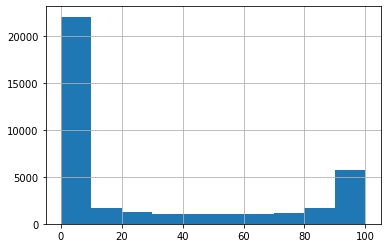

In [34]:
# así se distribuyen los radios censales según porcentage de deptos en altura
precenso_viviendas['ptipo_depto_alt'].hist();

In [35]:
# Vemos que estas tipologias no suman el 100% de las viviendas particulares
precenso_viviendas[['ptipo_casa','ptipo_depto_mix']].sum(axis=1)

0        96.8
1        99.7
2        95.0
3        98.0
4        97.8
         ... 
37812    80.1
37813    88.9
37814    97.9
37815     0.0
37816     0.0
Length: 37817, dtype: float64

Si revisan el diccionario que vimos antes, veran que no contamos con todas las tipologías habitacionales posibles. También, que dejamos la tipología de departamentos en altura, exclusivamente, para no contar casos dos veces.

Una de las cosas que podría interesarnos es conocer dónde se encuentran estos radios censales donde la tipología predominante son los departamentos en altura. Pero para eso, primero debemos aprender a filtrar casos en un dataframe. 

Y para ello, es necesario saber cómo funcionan los índices . Pero antes, retengamos la siguiente instrucción:

In [36]:
# asi obtenemos una "serie de valores booleanos"
precenso_viviendas[precenso_viviendas['ptipo_depto_alt']>62]

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto
15,radios.fid--bb562cf_1793415e9df_635,25199,La Plata,MULTIPOLYGON (((-57.93530886220352 -34.9171019...,18724.169,547.346,6,441,30,6,3,64410300603,459,6.1,93.9,92.3,Buenos Aires,La Plata
26,radios.fid--bb562cf_1793415e9df_640,26,Puerto Madryn,MULTIPOLYGON (((-65.04727158199958 -42.7660012...,46895.493,1144.086,26,7,20,6,4,260070200604,338,0.6,99.4,100.0,Chubut,Biedma
32,radios.fid--bb562cf_1793415e9df_646,28714,Mar del Plata,MULTIPOLYGON (((-57.544891725401534 -38.000434...,11238.972,424.352,6,357,110,29,3,63571102903,350,0.0,100.0,100.0,Buenos Aires,General Pueyrredón
57,radios.fid--bb562cf_1793415e9df_65f,56,Neuquén,MULTIPOLYGON (((-68.06624675700184 -38.9474448...,86406.973,1672.412,58,35,70,6,4,580350700604,308,48.0,43.5,62.4,Neuquén,Confluencia
75,radios.fid--bb562cf_1793415e9df_671,73,Cipolletti,MULTIPOLYGON (((-67.99761317323873 -38.9259456...,39598.508,953.458,62,42,400,28,4,620424002804,377,24.7,75.3,97.2,Río Negro,General Roca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37727,radios.fid--bb562cf_179345dc61d_-667a,32376,Ciudad Autónoma de Buenos Aires,MULTIPOLYGON (((-58.38975568185342 -34.6239819...,57384.107,1069.011,2,7,10,28,1,20070102801,298,6.5,76.5,84.9,Ciudad Autónoma de Buenos Aires,Comuna 1
37729,radios.fid--bb562cf_179345dc61d_-6678,32421,Ciudad Autónoma de Buenos Aires,MULTIPOLYGON (((-58.376839146587656 -34.598808...,16823.190,519.649,2,7,10,9,8,20070100908,411,0.5,99.3,100.0,Ciudad Autónoma de Buenos Aires,Comuna 1
37730,radios.fid--bb562cf_179345dc61d_-6677,32443,Ciudad Autónoma de Buenos Aires,MULTIPOLYGON (((-58.375363707416156 -34.599874...,34268.021,783.794,2,7,10,9,9,20070100909,754,0.0,100.0,97.9,Ciudad Autónoma de Buenos Aires,Comuna 1
37734,radios.fid--bb562cf_179345dc61d_-6673,32530,Ciudad Autónoma de Buenos Aires,MULTIPOLYGON (((-58.38579989499173 -34.6239327...,33167.929,780.837,2,7,10,28,4,20070102804,347,1.7,70.6,100.0,Ciudad Autónoma de Buenos Aires,Comuna 1



### Dataframes, Series y `axis`


Mientras el DataFrame es una estructura bidimensional, las Series de pandas son unidimensionales. Ambas estructuras estan compuestas de ejes (`axis`) etiquetados. Por ejemplo,

In [40]:
# un dataframe se puede crear a partir del siguiente metodo y puede almacenar distintos tipos de datos
pd.DataFrame({'columna_1':[1,2,3,4]})

,columna_1
0,1
1,2
2,3
3,4


In [41]:
# lo instanciamos
df_demo = pd.DataFrame({'columna_1':[1,2,3,4]})

In [42]:
# ahora le agregamos una columna, a partir de una serie con un metodo similar al anterior
df_demo['colulmna_2'] = pd.Series(['a','b','c','d'])

In [44]:
type(df_demo.columns), type(df_demo.index)

(pandas.core.indexes.base.Index, pandas.core.indexes.range.RangeIndex)

En este ejemplo, vemos que vamos agregando columnas en la medida que agregamos series a nuestro dataframe. Las cuales tambien pueden existir independientemente del mismo, ya que cuentan con sus propios metodos para ser instanciadas.

Como dijimos, un Dataframe cuenta con dos ejes (o axis en ingles). El `axis 0` representa las filas y el `axis 1` las columnas. Tanto las Series como los Dataframes comparten la misma dirección en sentido del `axis 0`.

Y como tambien mencionamos, ambos ejes cuentan con una etiqueta. El `Index` puede entenderse como el alias o label del eje horizantal (las filas). Este es opcional y debe ser igual al largo de la matriz.

In [45]:
# el index es un parametro opcional tanto de Series como de Dataframes
df_demo.index

RangeIndex(start=0, stop=4, step=1)

En nuestro ejemplo anterior, no especificamos ninguna etiqueta para el eje 0. Si no se pasa ningun Index, por defecto, este asume el largo de los datos que pasamos a la matriz. En este caso, de 0 a 3. 

De caso contrario, es decir, si se decide pasar un indice (o conjunto de etiquetas para el eje 0), entonces este debe ser de rango (n) - donde n es la longitud de la matriz. Probemos un ejemplo, 

In [46]:
# creamos un dataframe
pd.DataFrame({'columna_1':[1,2,3,4]}, index=['a','b','c','d'])

,columna_1
a,1
b,2
c,3
d,4


Probemos que pasa si el largo del indice que pasan no coincide con el de la matriz...

In [47]:
pd.DataFrame({'columna_1':[1,2,3,4]}, index=['a','b'])

ValueError: ignored

Veamos que esto nos devuelve un error cuando intentamos aplicar el metodo `.DataFrame`. Si prestan atencion, el `ValueError` nos da una pista. Segun nos informa, existe un problema de forma. Nos dice que para un indice de largo 4, le pasamos una instrucción con valores que tienen la mitad. 

En este tipo de circunstancias, es muy recomendable consultar la `docstring` del metodo que estamos intentando usar. Esta nos brindara pistas e informacion adicional de como utilizar sus parametros o cual podria ser el error que estamos cometiendo. Para ello, debemos utilizar `help`. 

In [48]:
# Solo estoy pasando una columna, ahora sí con la misma forma
pd.DataFrame({'columna_1':[1,2]}, index=['a','b'])

,columna_1
a,1
b,2


In [49]:
# ahora creemos un nuevo dataframe de prueba para terminar de fijar el concepto que veniamos viendo
df_demo_axis = pd.DataFrame({'columna_1':[1,2,3,4]}, index=['a','b','c','d'])

In [50]:
# creamos una nueva columa - fijense que para crear una serie, tambien podemos hacerlo directamente desde una lista
df_demo_axis['columna_2'] = [5,6,7,8]

In [51]:
df_demo_axis

,columna_1,columna_2
a,1,5
b,2,6
c,3,7
d,4,8


Algo importante a retener aca es lo que antes mencionamos como etiquetas. Cada eje o axis tiene un alias asociado a un string: `index` para el `axis 0` y `columns` para el `axis 1`. 

In [52]:
# aca el eje 0, a lo largo de las filas
df_demo_axis.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [53]:
# y aca la etiqueta del eje 1, a lo largo de nuestras columnas
df_demo_axis.columns

Index(['columna_1', 'columna_2'], dtype='object')

<figure>
<center>
<img src='https://drive.google.com/uc?id=1PM8VubDirE2dnJ394TNGEN_W_nQzbM8z' />
<figcaption></figcaption></center>
</figure>


In [54]:
# tenemos un dataframe con índices y columnas de largo 4 y 2
df_demo.shape

(4, 2)

In [55]:
df_demo_axis

,columna_1,columna_2
a,1,5
b,2,6
c,3,7
d,4,8


Esto que estamos viendo tiene sus implicancias sobre las operaciones que se llevan a cabo con un dataframe. 

In [56]:
# sumamos a lo largo del eje 0
df_demo_axis.sum(axis=0)

columna_1    10
columna_2    26
dtype: int64

In [57]:
# sumamos a lo largo del eje 1
df_demo_axis.sum(axis=1)

a     6
b     8
c    10
d    12
dtype: int64

Como dijimos, esta cuestion del indexado tiene sus implicancias en distintos tipos de operaciones que hacemos sobre un dataframe. Entre ellas, si queremos filtrar casos. Entremos un poco en este tema ...

In [ ]:
df[row_index, df_columns]

### Indexado por etiqueta y posición (loc/iloc)

Una operacion bastante recurrente a la hora de trabajar con base de datos es el filtrado. `pandas` cuenta con diferentes tipos de [indexado](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) para la seleccion de data. A grandes rasgos, `loc` e `iloc` aluden a la ubicacion (o `location`). Esto es, acceder a nuestros datos a partir de una ubicacion especifica dentro del obeto dataframe. Indexacion basada en dos formas de acceder a una ubicacion. A partir de etiquetes (`loc` o label based) o de posiciones numericas (`iloc` o integer position based)  

> **.loc**

La seleccion de filas por labels o etiquetas se apoya principalmente en el indice de un dataframe. En otras palabras, el metodo `.loc` selecciona filas a partir de los valores del indice. 

Se acuerdan la última instrucción que dejamos abierta?

Eso, se conoce como boolean indexing. Es decir, se evalua como falso o verdadero que el valor de cada fila se corresponda con el que elegimos para filtrar.

In [58]:
# por ejemplo, si es mayor o menor a un valor arbitrario, en nuestro caso 62
precenso_viviendas['ptipo_depto_alt']>62

0        False
1        False
2        False
3        False
4        False
         ...  
37812    False
37813    False
37814    False
37815    False
37816    False
Name: ptipo_depto_alt, Length: 37817, dtype: bool

In [59]:
# ahora, usamos la misma instruccion para filtrar casos. Es decir, boolean indexing
precenso_viviendas.loc[precenso_viviendas['ptipo_depto_alt']>62].sample(3)

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto
33306,radios.fid--bb562cf_179345dc61d_-77bf,36795,Rosario,MULTIPOLYGON (((-60.66692110968072 -32.9466275...,91904.643,1375.191,82,84,270,80,8,820842708008,996,12.0,86.0,81.7,Santa Fe,Rosario
3152,radios.fid--bb562cf_1793415e9df_1276,3115,Villa Mercedes,MULTIPOLYGON (((-65.45288921088425 -33.6902209...,28422.042,788.234,74,35,70,12,5,740350701205,338,0.0,100.0,100.0,San Luis,General Pedernera
5914,radios.fid--bb562cf_1793415e9df_1d40,5884,Almirante Brown,MULTIPOLYGON (((-58.38660398013151 -34.8040916...,157239.653,2140.706,6,28,10,25,7,60280102507,432,58.8,40.9,71.6,Buenos Aires,Almirante Brown


In [60]:
# un short podria ser este (omitimos el loc, pero seguimos trabajando sobre el indice)
precenso_viviendas[precenso_viviendas['ptipo_depto_alt']>62].sample(3)

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto
24061,radios.fid--bb562cf_1793415e9df_6423,26356,La Matanza,MULTIPOLYGON (((-58.54047337710485 -34.6698725...,52198.317,1050.330,6,427,10,25,13,64270102513,191,90.6,8.4,62.5,Buenos Aires,La Matanza
17370,radios.fid--bb562cf_1793415e9df_4a00,18135,Rivadavia,MULTIPOLYGON (((-68.56288323987806 -31.5515264...,51308.374,947.701,70,84,10,4,11,700840100411,220,23.2,76.8,92.3,San Juan,Rivadavia
20475,radios.fid--bb562cf_1793415e9df_5621,21791,Olavarría,MULTIPOLYGON (((-60.30924340069292 -36.8922621...,129983.650,1637.015,6,595,70,2,11,65950700211,321,74.5,22.1,67.6,Buenos Aires,Olavarría


In [61]:
# si quisieramos, ademas de filtrar filas retener algunas columnas
cols = ['prov','depto','link','total_viviendas']
precenso_viviendas.loc[precenso_viviendas['ptipo_depto_alt']>62,cols].head(5)

,prov,depto,link,total_viviendas
15,6,441,64410300603,459
26,26,7,260070200604,338
32,6,357,63571102903,350
57,58,35,580350700604,308
75,62,42,620424002804,377


Otra forma posible de haber querido filtrar nuestro dataframe es por nombre. Esto se podria haber logrado de dos maneras diferentes. Usando u omitiendo un label para el index o eje horizontal. Así,

In [62]:
df_test = precenso_viviendas.set_index('nomprov')

In [64]:
# Así nos quedaríamos con los radios de Buenos Aires
df_test.loc['Buenos Aires'].head()

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomdepto
nomprov,,,,,,,,,,,,,,,,,
Buenos Aires,radios.fid--bb562cf_1793415e9df_635,25199,La Plata,MULTIPOLYGON (((-57.93530886220352 -34.9171019...,18724.169,547.346,6,441,30,6,3,64410300603,459,6.1,93.9,92.3,La Plata
Buenos Aires,radios.fid--bb562cf_1793415e9df_646,28714,Mar del Plata,MULTIPOLYGON (((-57.544891725401534 -38.000434...,11238.972,424.352,6,357,110,29,3,63571102903,350,0.0,100.0,100.0,General Pueyrredón
Buenos Aires,radios.fid--bb562cf_1793415e9df_6cc,896,Lanús,MULTIPOLYGON (((-58.42002269923705 -34.7106959...,62868.183,1218.534,6,434,10,34,9,64340103409,250,70.0,30.0,0.0,Lanús
Buenos Aires,radios.fid--bb562cf_1793415e9df_78f,2828,América,MULTIPOLYGON (((-62.974926815592475 -35.494809...,196201.578,1960.613,6,679,10,6,12,66790100612,237,93.2,6.8,0.0,Rivadavia
Buenos Aires,radios.fid--bb562cf_1793415e9df_7a5,8283,Mar de Ajó - San Bernardo,MULTIPOLYGON (((-56.680875037189956 -36.693908...,51607.830,1033.671,6,420,20,17,5,64200201705,523,12.9,87.1,79.5,La Costa


In [65]:
# o con los de alguna provincia más. Siempre a partir de los valores del indice
df_test.loc[['Buenos Aires','Misiones']].index.unique()

Index(['Buenos Aires', 'Misiones'], dtype='object', name='nomprov')

In [68]:
df_test.loc[['Buenos Aires','Misiones']].index.unique()

Index(['Buenos Aires', 'Misiones'], dtype='object', name='nomprov')

Y si en lugar de haber querido indexar todo el dataframe, hubiesemos querido devolver columnas especificas, el metodo loc tambien habilita el filtrado de columns

In [69]:
df_test.loc[['Buenos Aires','Misiones'],
            ['total_viviendas','ptipo_depto_alt']].reset_index()

,nomprov,total_viviendas,ptipo_depto_alt
0,Buenos Aires,459,92.3
1,Buenos Aires,350,100.0
2,Buenos Aires,250,0.0
3,Buenos Aires,237,0.0
4,Buenos Aires,523,79.5
...,...,...,...
17211,Misiones,559,0.0
17212,Misiones,303,0.0
17213,Misiones,168,0.0
17214,Misiones,595,0.0


Esto hubiese resultado muy util de haber querido saber algun indicador especifico para comparar estas dos provincias. Supongamos, el promedio de departamentos en altura.

In [70]:
# asi vemos las categorias unicas
precenso_viviendas.nomprov.unique()

array(['Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'Santa Cruz', 'Chubut', 'Buenos Aires', 'Neuquén', 'Río Negro',
       'Córdoba', 'La Pampa', 'Mendoza', 'San Luis', 'Tucumán',
       'Misiones', 'Jujuy', 'Salta', 'Santiago del Estero',
       'Ciudad Autónoma de Buenos Aires', 'Catamarca', 'La Rioja',
       'San Juan', 'Santa Fe', 'Entre Ríos', 'Corrientes', 'Chaco',
       'Formosa'], dtype=object)

In [71]:
df_test.loc[['Ciudad Autónoma de Buenos Aires'],
            ['total_viviendas','ptipo_depto_alt']].mean()

total_viviendas    437.458444
ptipo_depto_alt     55.153150
dtype: float64

In [72]:
df_test.loc[['Formosa'],['total_viviendas','ptipo_depto_alt']].mean()

total_viviendas    331.501099
ptipo_depto_alt      5.616264
dtype: float64

Tanto las filas como las columnas pueden ser seleccionadas especificamente, como a partir de un rango. En el caso anterior, elegimos las provincias en base a un nombre. Aunque tambien hubiesemos podido elegir todas las provincias que responden a ciertos nombres. 

In [76]:
# hacemos slicing en las columnas
df_test.loc[['Formosa','Corrientes'],'total_viviendas':'ptipo_depto_alt']

,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt
nomprov,,,,
Formosa,242,95.0,3.3,0.0
Formosa,230,95.2,3.5,0.0
Formosa,223,93.7,5.4,0.0
Formosa,243,95.1,3.7,0.0
Formosa,367,95.9,2.5,0.0
...,...,...,...,...
Corrientes,393,69.7,25.2,49.5
Corrientes,425,83.3,8.3,0.0
Corrientes,448,74.3,25.0,18.8


In [77]:
# ahora hacemos lo mismo pero eligiendo todas las filas
df_test.loc[:,['total_viviendas','ptipo_depto_alt']]

,total_viviendas,ptipo_depto_alt
nomprov,,
"Tierra del Fuego, Antártida e Islas del Atlántico Sur",432,18.1
"Tierra del Fuego, Antártida e Islas del Atlántico Sur",336,17.8
Santa Cruz,479,0.0
Santa Cruz,251,0.0
Santa Cruz,582,0.0
...,...,...
Salta,402,0.0
Salta,434,0.0
Córdoba,149,0.0


Hasta acá, dos símbolos importantes: `,` y `:`. El primero para seleccionar casos puntuales, el segundo para hacer "slicing".

In [78]:
# veamos que pasa si queremos hacer el mismo tipo de slicing pero con las filas 
df_test.loc['Buenos Aires':'Chaco',['total_vivienas','ptipo_depto_alt']]

KeyError: ignored

Que significa esto? Basicamente que si el valor no es unico (como lo era en el caso de las columnas) la evaluacion falla. Miremos que pasa si agrupamos nuestros datos por el nombre de la estacion de origen...

In [83]:
precenso_viviendas.groupby(['nomprov']).size().loc['Buenos Aires':'Chaco']

nomprov
Buenos Aires                                             16301
Catamarca                                                  289
Chaco                                                      481
Chubut                                                     553
Ciudad Autónoma de Buenos Aires                           3778
Corrientes                                                 442
Córdoba                                                   2955
Entre Ríos                                                 833
Formosa                                                    455
Jujuy                                                      604
La Pampa                                                   413
La Rioja                                                   242
Mendoza                                                   1530
Misiones                                                   915
Neuquén                                                    624
Río Negro                                      

Lo que hicimos aca fue, primero agrupar nuestros datos por nombre de provincia y luego contar la cantidad de radios censales. Esto, como medida arbitraria, simplemente para conseguir que los valores del indice fuesen unicos. Que aparecieran una sola vez. Asi, vemos que podemos usar el slicing que antes no pudimos. Ir de x a y valor del indice como si estuviesen dentro de un rango...

#### ... una excusa para hablar del método `groupby`

Acabamos de mencionar un método que aparecerá bastante en las clases sucesivas. El [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). 

Un caso muy frecuente de uso, es aplicarlo a un objeto de tipo DataFrame. Imagínense que queremos saber la cantidad de radios por provincia:

In [84]:
precenso_viviendas.groupby('nomprov').size()

nomprov
Buenos Aires                                             16301
Catamarca                                                  289
Chaco                                                      481
Chubut                                                     553
Ciudad Autónoma de Buenos Aires                           3778
Corrientes                                                 442
Córdoba                                                   2955
Entre Ríos                                                 833
Formosa                                                    455
Jujuy                                                      604
La Pampa                                                   413
La Rioja                                                   242
Mendoza                                                   1530
Misiones                                                   915
Neuquén                                                    624
Río Negro                                      

In [85]:
# o bien
precenso_viviendas.groupby('nomprov')['total_viviendas'].sum()

nomprov
Buenos Aires                                             6448510
Catamarca                                                 111798
Chaco                                                     201870
Chubut                                                    223403
Ciudad Autónoma de Buenos Aires                          1652718
Corrientes                                                154067
Córdoba                                                  1075154
Entre Ríos                                                262411
Formosa                                                   150833
Jujuy                                                     219049
La Pampa                                                  131631
La Rioja                                                  125824
Mendoza                                                   550167
Misiones                                                  371844
Neuquén                                                   258295
Río Negro        

In [86]:
# hasta incluso ...
precenso_viviendas.groupby('nomprov')[['total_viviendas']].sum().sort_values(by='total_viviendas',
                                                                             ascending=False)

,total_viviendas
nomprov,
Buenos Aires,6448510
Ciudad Autónoma de Buenos Aires,1652718
Santa Fe,1319650
Córdoba,1075154
Mendoza,550167
Tucumán,428633
Salta,374176
Misiones,371844
Río Negro,282518


In [91]:
# tambien podriamos comparar cantidad de viviendas 
type(precenso_viviendas.groupby(['nomprov','nomdepto'])[['total_viviendas']].sum())

pandas.core.frame.DataFrame

#### ... seguimos indexando 

**Volviendo al tema del filtrado**, cómo creen que hubiésemos hecho las distintas indexaciones si el nombre de la provincia no era el índice del dataframe. Muy sencillo, con el mismo `.loc` que vimos inicialmente. De la siguiente forma:

In [92]:
precenso_viviendas.loc[precenso_viviendas['nomprov']=='Chaco'].head()

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto
560,radios.fid--bb562cf_1793415e9df_856,561,Presidencia Roque Sáenz Peña,MULTIPOLYGON (((-60.462756202967455 -26.798989...,1681543.625,6598.330,22,21,10,6,7,220210100607,589,77.1,19.0,0.0,Chaco,Comandante Fernández
563,radios.fid--bb562cf_1793415e9df_859,543,Hermoso Campo,MULTIPOLYGON (((-61.339548962563 -27.605658591...,1938909.925,7605.771,22,39,10,1,11,220390100111,458,83.6,12.3,0.0,Chaco,2 de Abril
564,radios.fid--bb562cf_1793415e9df_85a,544,Santa Sylvina,MULTIPOLYGON (((-61.143342163961954 -27.827111...,305452.329,2415.157,22,43,20,1,5,220430200105,337,68.5,31.0,0.0,Chaco,Fray Justo Santa María de Oro
565,radios.fid--bb562cf_1793415e9df_85b,545,Villa Angela,MULTIPOLYGON (((-60.720034949226424 -27.567216...,123986.446,1454.240,22,98,30,1,7,220980300107,294,94.2,5.8,0.0,Chaco,Mayor Luis Jorge Fontana
566,radios.fid--bb562cf_1793415e9df_85c,546,Coronel Du Graty,MULTIPOLYGON (((-60.90154381909407 -27.6864365...,920710.965,7035.032,22,98,10,4,1,220980100401,368,91.3,7.4,0.0,Chaco,Mayor Luis Jorge Fontana


In [93]:
# se acuerdan?
precenso_viviendas['nomprov']=='Chaco'

0        False
1        False
2        False
3        False
4        False
         ...  
37812    False
37813    False
37814    False
37815    False
37816    False
Name: nomprov, Length: 37817, dtype: bool

La logica de funcionamiento es basicamente la misma. Por ejemplo, tambien podriamos seleccionar un conjunto de columnas especificas para las provincias filtradas.

In [94]:
# los radios censales del Chaco
precenso_viviendas.loc[precenso_viviendas['nomprov']=='Chaco', 
                       ['link','total_viviendas']].head()

,link,total_viviendas
560,220210100607,589
563,220390100111,458
564,220430200105,337
565,220980300107,294
566,220980100401,368


Tembien podriamos haber elegido las columnas con un solo string o haciendo slicing con `:`.

In [95]:
precenso_viviendas.loc[precenso_viviendas['nomprov']=='Chaco', 
                       'total_viviendas':'ptipo_depto_alt'].head()

,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt
560,589,77.1,19.0,0.0
563,458,83.6,12.3,0.0
564,337,68.5,31.0,0.0
565,294,94.2,5.8,0.0
566,368,91.3,7.4,0.0


Imaginen que quisieran filtrar el dataframe para mas de un nombre y que la tarea no se vuelva muy tediosa. Una alternativa podria ser ...

In [96]:
precenso_viviendas.loc[precenso_viviendas['nomprov'].isin(['Chaco','Misiones','Formosa'])] 

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto
124,radios.fid--bb562cf_1793415e9df_6a2,1651,Santo Pipó,MULTIPOLYGON (((-55.41527806971392 -27.1494310...,202472.782,1805.528,54,98,120,2,3,540981200203,21,95.2,0.0,0.0,Misiones,San Ignacio
260,radios.fid--bb562cf_1793415e9df_72a,619,Apóstoles,MULTIPOLYGON (((-55.736383779959006 -27.917279...,277700.505,2128.203,54,7,10,6,20,540070100620,247,90.3,8.5,0.0,Misiones,Apóstoles
284,radios.fid--bb562cf_1793415e9df_742,620,Concepción de la Sierra,MULTIPOLYGON (((-55.523279685451264 -27.993190...,376301.811,2804.408,54,35,20,4,11,540350200411,295,89.8,9.8,0.0,Misiones,Concepción
317,radios.fid--bb562cf_1793415e9df_763,621,San Javier,MULTIPOLYGON (((-55.13748601600779 -27.8665082...,378196.706,2496.621,54,105,40,2,19,541050400219,305,76.3,23.7,0.0,Misiones,San Javier
367,radios.fid--bb562cf_1793415e9df_795,631,Posadas,MULTIPOLYGON (((-55.93593423131821 -27.3701445...,117786.445,1479.967,54,28,30,19,22,540280301922,443,21.0,78.1,97.4,Misiones,Capital
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27819,radios.fid--bb562cf_1793415e9df_72d1,31089,Posadas,MULTIPOLYGON (((-55.937449452477786 -27.404319...,723825.039,4533.938,54,28,30,12,6,540280301206,559,82.3,15.0,0.0,Misiones,Capital
27844,radios.fid--bb562cf_1793415e9df_72ea,31118,Posadas,MULTIPOLYGON (((-55.94449317304075 -27.4045146...,460617.063,2900.983,54,28,30,12,5,540280301205,303,94.1,5.6,0.0,Misiones,Capital
27869,radios.fid--bb562cf_1793415e9df_7303,31147,Posadas,MULTIPOLYGON (((-55.95641741201351 -27.4301354...,1141240.769,5974.620,54,28,30,12,4,540280301204,168,70.8,20.8,0.0,Misiones,Capital
27894,radios.fid--bb562cf_1793415e9df_731c,31176,Posadas,MULTIPOLYGON (((-55.94228962925939 -27.4117399...,350932.948,2789.712,54,28,30,12,9,540280301209,595,64.4,29.7,0.0,Misiones,Capital


Lo que estamos haciendo aca, es usar el metodo `isin` con una lista de string para que nos devuelva un array de True/False values con el que hacer el indexado. Ahora, supongamos que queremos filtrar valores en funcion de ciertos rangos o bandas de valores.

In [97]:
# por ejemplo, podriamos querer saber cuales son los casos entre tal y cual valor de referencia
precenso_viviendas.loc[(precenso_viviendas['total_viviendas'] > 10) 
                      & (precenso_viviendas['total_viviendas'] <= 400), 
                      ['link', 'nomprov','nomdepto']] 

,link,nomprov,nomdepto
1,940080101201,"Tierra del Fuego, Antártida e Islas del Atlánt...",Río Grande
3,780210401202,Santa Cruz,Güer Aike
12,260910200409,Chubut,Sarmiento
14,260140500107,Chubut,Cushamen
16,260840700307,Chubut,Río Senguer
...,...,...,...
37803,660350100120,Salta,Cerrillos
37805,660350100121,Salta,Cerrillos
37809,660350100116,Salta,Cerrillos
37810,660350100119,Salta,Cerrillos


> **.iloc**

El segundo tipo de indexado que mencionamos es el `integer based`. Es decir, seleccion a partir de posiciones especificas. Esto significa que podemos seleccionar filas o columnas segun el lugar en el que aparecen en el dataframe.

In [98]:
# las filas van de cero a 
precenso_viviendas.shape[0]

37817

In [ ]:
# y las columnas de cero a 
precenso_viviendas.shape[1]

In [102]:
# la primer fila ...
precenso_viviendas.iloc[0:1]

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto
0,radios.fid--bb562cf_1793415e9df_626,1,Ushuaia,MULTIPOLYGON (((-68.33620817638486 -54.8128028...,115823.151,1970.06,94,15,20,8,5,940150200805,432,31.5,65.3,18.1,"Tierra del Fuego, Antártida e Islas del Atlánt...",Ushuaia


In [103]:
precenso_viviendas.head(1)

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto
0,radios.fid--bb562cf_1793415e9df_626,1,Ushuaia,MULTIPOLYGON (((-68.33620817638486 -54.8128028...,115823.151,1970.06,94,15,20,8,5,940150200805,432,31.5,65.3,18.1,"Tierra del Fuego, Antártida e Islas del Atlánt...",Ushuaia


In [105]:
# todas las filas de la primer columna
precenso_viviendas.iloc[:,0]

,FID,id
0,radios.fid--bb562cf_1793415e9df_626,1
1,radios.fid--bb562cf_1793415e9df_627,3
2,radios.fid--bb562cf_1793415e9df_628,4
3,radios.fid--bb562cf_1793415e9df_629,5
4,radios.fid--bb562cf_1793415e9df_62a,6
...,...,...
37812,radios.fid--bb562cf_179345dc61d_-6625,10042
37813,radios.fid--bb562cf_179345dc61d_-6624,10324
37814,radios.fid--bb562cf_179345dc61d_-6623,384
37815,radios.fid--bb562cf_179345dc61d_-6622,365


In [106]:
# o las filas que van del 10 al 25 para las columnas de la 5 a la 9
precenso_viviendas.iloc[10:25,5:9]

,perimeter,prov,depto,codloc
10,3732.694,26,21,50
11,1840.720,26,21,30
12,2452.558,26,91,20
13,42092.681,26,14,90
14,3087.639,26,14,50
15,547.346,6,441,30
16,6667.554,26,84,70
17,5717.436,26,98,20
18,7050.021,26,35,60
19,1955.660,26,35,30


In [107]:
# tambien podriamos haber elegido valores especificos con listas
precenso_viviendas.iloc[[4,6,7],[1,7,8]]

,id,depto,codloc
4,6,42,10
6,8,49,20
7,9,21,70


Como se puede ver la logica es bastante similar para los dos tipos de indexado. Primero se selecciona por fila y luego por columna. Algo asi como:
```
.iloc / .loc[<row inderxer>,<col_indexer>]
```

A grandes rasgos, lo que estuvimos haciendo hasta acá fue acceder a items únicos o a secuencias/partes de una colección de datos. Es decir, [indexing y slicing](https://www.blog.duomly.com/slicing-in-python-what-is-it/) 

### Alternativas para reemplazar valores en un dataframe

La columna `link` almacena un identificador del radio en formato integer. Qué hubiese pasado si necesitabamos cambiar algun nombre o valor en el dataframe. Cómo hubiesemos podido hacerlo?

In [108]:
precenso_viviendas.link.dtype

dtype('int64')

In [111]:
# Tomamos un radio al azar para cambiar, por ejemplo, el nombre del departamento
precenso_viviendas.loc[precenso_viviendas['link']==62030500215,]['nomdepto']

5348    Coronel Suárez
Name: nomdepto, dtype: object

In [112]:
precenso_viviendas.columns[17]

'nomdepto'

In [113]:
# la columna 17 es el nombre del departamento
precenso_viviendas.iloc[5348,17] = 'coronel suarez'

In [114]:
# y volvemos a ver el dataframe para ver si se cambio el nombre del departamento
precenso_viviendas.loc[precenso_viviendas['link']==62030500215]

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto
5348,radios.fid--bb562cf_1793415e9df_1b0a,5321,Huanguelén,MULTIPOLYGON (((-61.95396416261946 -37.0581007...,974866.702,6000.464,6,203,50,2,15,62030500215,205,98.0,0.0,0.0,Buenos Aires,coronel suarez


In [115]:
# volvamos las cosas a su estado original, pero con .loc
precenso_viviendas.loc[precenso_viviendas['nomdepto']=='coronel suarez','nomdepto'] = 'Coronel Suárez'

In [116]:
# revisamos, y todo a la normalidad
precenso_viviendas.iloc[5348,17]

'Coronel Suárez'

In [117]:
# también podríamos haber utilizado un diccionario
cambio = precenso_viviendas.nomdepto.replace({'Coronel Suárez':'coronel suarez'})

In [118]:
cambio.iloc[5348]

'coronel suarez'

In [123]:
# total de radios que sufrieron esa modificacion!
len(cambio[cambio.apply(lambda x: x=='coronel suarez')])

45

Lo importante a tener en cuenta, es que la principal diferencia entre ambos recursos es que uno nos permite cambiar valores puntuales en nuestro dataframe. Mientras que el otro va a realizar la modificacion a lo largo de toda la serie de pandas.

### Tratamiento de valores nulos

Recuerdan que vimos que habían algunos valores nulos? Veamos rápidamente qué sucede si intentamos cambiar el `dtype` de alguna de esas columnas ... 

In [124]:
precenso_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37817 entries, 0 to 37816
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FID              37817 non-null  object 
 1   id               37817 non-null  int64  
 2   nomloc           37817 non-null  object 
 3   geom             37817 non-null  object 
 4   area             37817 non-null  float64
 5   perimeter        37817 non-null  float64
 6   prov             37817 non-null  int64  
 7   depto            37817 non-null  int64  
 8   codloc           37817 non-null  int64  
 9   frac             37817 non-null  int64  
 10  radio            37817 non-null  int64  
 11  link             37817 non-null  int64  
 12  total_viviendas  37817 non-null  int64  
 13  ptipo_casa       37814 non-null  float64
 14  ptipo_depto_mix  37814 non-null  float64
 15  ptipo_depto_alt  37814 non-null  float64
 16  nomprov          37817 non-null  object 
 17  nomdepto    

In [125]:
# por ejemplo, ir de float a integer
precenso_viviendas.ptipo_depto_alt.astype(int)

IntCastingNaNError: ignored

Interpretemos el error, nos dice que no puede convertir en integer un valor que es nulo. Cómo hacemos para identificarlos? Hay varias alternativas

#### Identificando casos

In [129]:
# chequeamos la presencia de valores nulos con el metodo .isna()
precenso_viviendas.ptipo_depto_alt.isna().values.any()

True

In [130]:
# esto nos devuelve una serie de booleanos
precenso_viviendas.ptipo_depto_alt.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
37812    False
37813    False
37814    False
37815    False
37816    False
Name: ptipo_depto_alt, Length: 37817, dtype: bool

In [131]:
# que podemos utilizar para hacer boolean indexing y ver que pasa en nuestro dataframe
precenso_viviendas.loc[precenso_viviendas.ptipo_depto_alt.isna()]

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto
2774,radios.fid--bb562cf_1793415e9df_10fc,2723,James Craik,MULTIPOLYGON (((-63.459354759318906 -32.159010...,484555.843,3277.561,14,161,70,3,7,141610700307,0,NaN,NaN,NaN,Córdoba,Tercero Arriba
3380,radios.fid--bb562cf_1793415e9df_135a,3337,Freyre,MULTIPOLYGON (((-62.1027569934044 -31.17920529...,83514.020,1831.138,14,140,220,10,2,141402201002,0,NaN,NaN,NaN,Córdoba,San Justo
5165,radios.fid--bb562cf_1793415e9df_1a53,5117,Las Perdices,MULTIPOLYGON (((-63.71513514427371 -32.7028956...,76917.053,1417.958,14,161,90,5,3,141610900503,0,NaN,NaN,NaN,Córdoba,Tercero Arriba


In [132]:
# tambien podemos usar map
precenso_viviendas[precenso_viviendas.ptipo_depto_alt.map(pd.isna)]

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto
2774,radios.fid--bb562cf_1793415e9df_10fc,2723,James Craik,MULTIPOLYGON (((-63.459354759318906 -32.159010...,484555.843,3277.561,14,161,70,3,7,141610700307,0,NaN,NaN,NaN,Córdoba,Tercero Arriba
3380,radios.fid--bb562cf_1793415e9df_135a,3337,Freyre,MULTIPOLYGON (((-62.1027569934044 -31.17920529...,83514.020,1831.138,14,140,220,10,2,141402201002,0,NaN,NaN,NaN,Córdoba,San Justo
5165,radios.fid--bb562cf_1793415e9df_1a53,5117,Las Perdices,MULTIPOLYGON (((-63.71513514427371 -32.7028956...,76917.053,1417.958,14,161,90,5,3,141610900503,0,NaN,NaN,NaN,Córdoba,Tercero Arriba


In [133]:
# o mapear nuestras propias funciones
def identifica_nulos(x):
  return x != x

In [134]:
import numpy as np

In [135]:
np.nan != np.nan

True

In [136]:
precenso_viviendas[precenso_viviendas.ptipo_depto_alt.map(identifica_nulos)]

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto
2774,radios.fid--bb562cf_1793415e9df_10fc,2723,James Craik,MULTIPOLYGON (((-63.459354759318906 -32.159010...,484555.843,3277.561,14,161,70,3,7,141610700307,0,NaN,NaN,NaN,Córdoba,Tercero Arriba
3380,radios.fid--bb562cf_1793415e9df_135a,3337,Freyre,MULTIPOLYGON (((-62.1027569934044 -31.17920529...,83514.020,1831.138,14,140,220,10,2,141402201002,0,NaN,NaN,NaN,Córdoba,San Justo
5165,radios.fid--bb562cf_1793415e9df_1a53,5117,Las Perdices,MULTIPOLYGON (((-63.71513514427371 -32.7028956...,76917.053,1417.958,14,161,90,5,3,141610900503,0,NaN,NaN,NaN,Córdoba,Tercero Arriba


Hasta acá varios caminos para llegar a nuestros valores `NaN`. Este es un problema bastante recurrente. Y las decisiones sobre como abordarlo pueden ser variadas.

En nuestro caso, los faltantes responden a la provincia de Cordoba e involucran a mas de una columna.

#### Imputar con ceros

In [137]:
# todas las columnas del dataframe
con_ceros = precenso_viviendas.fillna(0)

In [138]:
con_ceros[con_ceros.link.isin([141610700307,141402201002,141610900503])]

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto
2774,radios.fid--bb562cf_1793415e9df_10fc,2723,James Craik,MULTIPOLYGON (((-63.459354759318906 -32.159010...,484555.843,3277.561,14,161,70,3,7,141610700307,0,0.0,0.0,0.0,Córdoba,Tercero Arriba
3380,radios.fid--bb562cf_1793415e9df_135a,3337,Freyre,MULTIPOLYGON (((-62.1027569934044 -31.17920529...,83514.020,1831.138,14,140,220,10,2,141402201002,0,0.0,0.0,0.0,Córdoba,San Justo
5165,radios.fid--bb562cf_1793415e9df_1a53,5117,Las Perdices,MULTIPOLYGON (((-63.71513514427371 -32.7028956...,76917.053,1417.958,14,161,90,5,3,141610900503,0,0.0,0.0,0.0,Córdoba,Tercero Arriba


In [139]:
# el metodo es tambien aplicable a las series por separado, por ejemplo
columna_sola = precenso_viviendas.ptipo_depto_alt.fillna(0)

In [140]:
columna_sola[columna_sola.index.isin([2774,3380,5165])]

2774    0.0
3380    0.0
5165    0.0
Name: ptipo_depto_alt, dtype: float64

In [141]:
# tambien se podria eliminar las filas directamente 
eliminados = precenso_viviendas.dropna()

In [142]:
eliminados[eliminados.link.isin([141610700307,141402201002,141610900503])]

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto


#### Imputar con estadísticos

Estamos frente a un caso particular. Nuestros casos perdidos pertenecen a una provincia, con lo cual, si hicieramos:

In [144]:
# una salida rapida, completando los faltantes con la mediana de toda la serie
precenso_viviendas.ptipo_depto_alt.fillna(precenso_viviendas.ptipo_depto_alt.median)

0        18.1
1        17.8
2         0.0
3         0.0
4         0.0
         ... 
37812     0.0
37813     0.0
37814     0.0
37815     0.0
37816     0.0
Name: ptipo_depto_alt, Length: 37817, dtype: object

 ... estaríamos imputando casos particulares (acá, algunos radios de ciertos departamentos de Córodoba). Eso no está ni bien ni mal. Simplemente, se puede adecuar más o menos a lo que estemos esperando de nuestro datos. 
 
 Por ejemplo, también podríamos querer completar casos nulos en función de los estadísticos de determinada combinación provincia/departamento. 

 Para ello, primero deberíamos calcular dichos estadísticos. Un `groupby` nos va a resultar ideal para llevar esta tarea a cabo.

In [145]:
# nos quedamos con los departamentos que queremos
target = precenso_viviendas.loc[(precenso_viviendas['nomprov']=='Córdoba') & 
                                (precenso_viviendas['nomdepto'].isin(['Tercero Arriba', 
                                                                      'San Justo']))]

In [146]:
target.head()

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto
133,radios.fid--bb562cf_1793415e9df_6ab,128,Almafuerte,MULTIPOLYGON (((-64.2576931139305 -32.18483290...,303481.082,2369.478,14,161,10,6,3,141610100603,488,84.4,15.4,0.0,Córdoba,Tercero Arriba
134,radios.fid--bb562cf_1793415e9df_6ac,129,Río Tercero,MULTIPOLYGON (((-64.12124099508684 -32.1748267...,87213.882,1777.497,14,161,150,9,20,141611500920,262,82.8,15.6,39.0,Córdoba,Tercero Arriba
402,radios.fid--bb562cf_1793415e9df_7b8,398,Devoto,MULTIPOLYGON (((-62.30623647916249 -31.4034822...,266574.286,2590.404,14,140,160,15,12,141401601512,459,95.0,3.9,0.0,Córdoba,San Justo
403,radios.fid--bb562cf_1793415e9df_7b9,399,San Francisco,MULTIPOLYGON (((-62.068831156093026 -31.439399...,111158.753,1500.838,14,140,360,13,13,141403601313,360,87.2,12.5,0.0,Córdoba,San Justo
410,radios.fid--bb562cf_1793415e9df_7c0,393,Sacanta,MULTIPOLYGON (((-63.044807562395405 -31.661252...,13421.924,808.032,14,140,350,1,8,141403500108,12,66.7,0.0,0.0,Córdoba,San Justo


In [147]:
# y creamos algunos estadisticos de referencia
indicadores = ['ptipo_casa', 'ptipo_depto_mix','ptipo_depto_alt']
estadisticos = target.groupby(['nomprov','nomdepto'])[indicadores].median() # o mean, min, max, etc.

In [150]:
target.groupby(['nomprov','nomdepto'])[indicadores].median()

ptipo_casa  ptipo_depto_mix  ptipo_depto_alt
nomprov nomdepto                                                    
Córdoba San Justo            91.10              7.3              0.0
        Tercero Arriba       84.55             10.8              0.0

In [148]:
# reseteo el indice para poder acceder al nombre de la serie nomdepto
estadisticos = estadisticos.reset_index()

In [149]:
estadisticos

,nomprov,nomdepto,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt
0,Córdoba,San Justo,91.10,7.3,0.0
1,Córdoba,Tercero Arriba,84.55,10.8,0.0


In [151]:
# este dataframe lo podriamos usar para reemplazar casos puntuales
estadisticos.loc[estadisticos.nomdepto == 'San Justo']

,nomprov,nomdepto,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt
0,Córdoba,San Justo,91.1,7.3,0.0


In [152]:
# hacemos una copia del precenso
cambios_target = precenso_viviendas.copy()

In [153]:
def completar_nulos(df, reemplazos, provincia, departamento, indicador):
  '''
  Reemplaza valores nulos en el dataframe del precenso de viviendas
  ...
  df: pandas.DataFrame
  reemplazos: pandas.DataFrame
  provincia: string
  departamento: string
  indicador: string

  Devuelve:
  Un pandas.DataFrame con valores nulos imputados
  '''
   
  # filtramos nuestro dataframe de reemplazos para algun departamento de interes
  reemplazos = reemplazos.loc[reemplazos.nomdepto == departamento]
  
  # identificamos casos nulos
  nulos = df[df[indicador].isna()]
  nulos = nulos.loc[(nulos['nomprov']==provincia) & 
                    (nulos['nomdepto']==departamento)]
  radios_nulos = nulos.link.unique()
  print('Reemplazaremos con {}'.format(reemplazos[indicador].values))
  # filtramos provincia y departamento en el dataframe donde vamos a completar nulos
  df.loc[df.link.isin(radios_nulos), indicador] = reemplazos[indicador].values[0]
  
  return df

In [154]:
# guardamos el resultado
resultado = completar_nulos(df=cambios_target, reemplazos=estadisticos, 
                            provincia='Córdoba', departamento='Tercero Arriba',
                            indicador='ptipo_depto_alt')

Reemplazaremos con [0.]


In [155]:
# chequeamos de nuevo cuales son nuestros nulos, ahora tenemos un solo radio. El correspondiente a uno de los dos departamentos
resultado[resultado['ptipo_depto_alt'].isna()]

,FID,id,nomloc,geom,area,perimeter,prov,depto,codloc,frac,radio,link,total_viviendas,ptipo_casa,ptipo_depto_mix,ptipo_depto_alt,nomprov,nomdepto
3380,radios.fid--bb562cf_1793415e9df_135a,3337,Freyre,MULTIPOLYGON (((-62.1027569934044 -31.17920529...,83514.02,1831.138,14,140,220,10,2,141402201002,0,NaN,NaN,NaN,Córdoba,San Justo


### Errores y warnings, el SettingWithCopy

Si volvemos al principio de la clase, van a ver que el dataframe `precenso_viviendas` fue declarado como copia. Qué quiere decir esto?

Básicamente, que un objeto puede ser creado como algo singular o como una copia de otro objeto.

Cuando se crea un objeto con `.copy()`, lo que hacemos es borrar la referencia en memoria que el nuevo objeto tiene respecto del original.
 
Esto lo podemos ver explícitamente si ejeecutamos el método `._is_copy`. 

In [ ]:
# se borra la referencia al objeto, es decir no nos devuelve nada
print(precenso_viviendas._is_copy)

Esto puede parecer confuso, pero lo que hay que tener en cuenta, es que lo que este método devuelve es la [weakref](https://rico-schmidt.name/pymotw-3/weakref/index.html) al objeto o dataframe original. Al haberlo declarado explícitamente como una copia esa referencia se desactiva. 

Cuando llamamos el [método copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html).  estamos diciendo que vamos a trabajar sobre una copia y, por lo tanto, no vamos a modificar el objeto original

In [ ]:
# view devuelve un boolean que evalúa si es o no el objeto original. Recuerden que el nuestro era una copia
precenso_viviendas._is_view

En programación, una buena práctica es no hacer cambios `inplace` sobre un mismo objeto. Por eso, es que existe el warning `SettingWithCopyWarning`.

Este es un lugar común al que, aquel que trabaja asiduamente con `pandas`, seguramente ha caído más de una vez. No se trata de un error ya que esta advertencia nos informa sobre operaciones que son efectivamente válidas o permitidas. Algo que puede resultar muy útil para evitar posibles bugs en nuestro código.


Supongamos que queremos hacer los siguientes cambios en un dataframe:

In [ ]:
# no declaramos el nuevo objeto como copia
copy_pcenso = precenso_viviendas.loc[precenso_viviendas['nomprov'] == 'Córdoba']

En `pandas` algunas acciones pueden devolver una `view` o una `copy` de nuestra data.

In [ ]:
# como no hicimos ninguna declaración explícita, esta copia referencia al df en memoria 0x7...
print(copy_pcenso._is_copy)

Por eso, si intentamos hacer cualquier tipo de modificación sobre este dataframe se nos advertirá que los cambios los estamos efectuando sobre una copia. Y no sobre el dataframe original.

In [ ]:
# miren lo que pasa si, por ejemplo, queremos borrar o agregar alguna columna
copy_pcenso.drop(columns='FID',inplace=True)

In [ ]:
# pero el cambio se hace
'FID' in copy_pcenso.columns

La serie `FID` se borro exitosamente, pero el warning nos advierte que por ahí estemos haciendo algo no deseado. El `SettingWithCopyWarnig` nos alerta sobre esto para que consideremos si el objeto que estamos modificando debe o no ser el original. Algo no menor en un flujo de trabajo más extenso.

Al no haber declarado explícitamente `copy_pcenso` como copia del df `precenso_viviendas`, es posible que no supieramos que el método `loc` devuelve una copia del dataframe. 

Por lo tanto, debemos decidir si los próximos pasos los daremos sobre una `view` o una `copy` del original.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1PiPoT2rRHRqKpFYtjQiu8ZZaaGHlGD1N' />
<figcaption></figcaption></center>
</figure>

El caso anterior se conoce como `hidden chaining`. Básicamente porque hay un dataframe que es copia de una view y no se declaró como tal.

Otro caso bastante común es el `chained assignement`. Este tipo de situaciones ocurren cuando se combinan operaciones que involucran algún tipo de indexado - `data[:][:]` - con asignación de valores.

Esta combinación de operaciones tampoco modifican el objeto original. Imaginemos que hubiesemos necesitado actualizar el nombre de alguna localidad.

In [ ]:
# nos aseguramos de crear una copia
copy_pcenso = precenso_viviendas.loc[precenso_viviendas['nomprov'] == 'Córdoba'].copy()

# seguimos modificando una copia sin ser concientes de ello
copy_pcenso[copy_pcenso.nomloc=='Córdoba']['nomloc'] = 'Cordoba'

Por eso, también recibimos el warning. El chained assignement supone dos acciones que se ejecutan independientemente. Un método de acceso y otro de asignación. Esto nos devuelve una copia. Por eso, para evitar el warning debemos combinar las operaciones encadenadas en una única operación utilizando el método `.loc`. Así: 

In [ ]:
# con una unica operacion aseguramos que pandas esta trabajando sobre el df original
copy_pcenso.loc[copy_pcenso.nomloc=='Córdoba', 'nomloc'] = 'Cordoba'